## DBSCAN

Another very useful clustering algorithm is *DBSCAN* (which stands for “density-based spatial clustering of applications with noise”). The main benefits of DBSCAN are that it does not require the user to set the number of clusters a priori, it can capture clusters of complex shapes, and it can identify points that are not part of any cluster. DBSCAN is somewhat slower than agglomerative clustering and k-means, but still scales to relatively large datasets.

DBSCAN works by identifying points that are in “crowded” regions of the feature space, where many data points are close together. These regions are referred to as dense regions in feature space. The idea behind DBSCAN is that clusters form dense regions of data, separated by regions that are relatively empty.

Points that are within a dense region are called *core samples* (or *core points*), and they are defined as follows. There are two parameters in DBSCAN: *min_samples* and *eps*. If there are at least *min_samples* many data points within a distance of *eps* to a given data point, that data point is classified as a core sample. Core samples that are closer to each other than the distance eps are put into the same cluster by DBSCAN.

The algorithm works by picking an arbitrary point to start with. It then finds all points with distance eps or less from that point. If there are less than min_samples points within distance eps of the starting point, this point is labeled as noise, meaning that it doesn’t belong to any cluster. If there are more than min_samples points within a distance of eps, the point is labeled a core sample and assigned a new cluster label. Then, all neighbors (within eps) of the point are visited. If they have not been assigned a cluster yet, they are assigned the new cluster label that was just created. If they are core samples, their neighbors are visited in turn, and so on. The cluster grows until there are no more core samples within distance eps of the cluster. Then another point that hasn’t yet been visited is picked, and the same procedure is repeated.

In the end, there are three kinds of points: core points, points that are within distance eps of core points (called boundary points), and noise. When the DBSCAN algorithm is run on a particular dataset multiple times, the clustering of the core points is always the same, and the same points will always be labeled as noise. However, a boundary point might be neighbor to core samples of more than one cluster. Therefore, the cluster membership of boundary points depends on the order in which points are visited. Usually there are only few boundary points, and this slight dependence on the order of points is not important.

Let’s apply DBSCAN on the synthetic dataset we used to demonstrate agglomerative clustering. Like agglomerative clustering, DBSCAN does not allow predictions on new test data, so we will use the fit_predict method to perform clustering and return the cluster labels in one step:

In [3]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn
from IPython.display import display
import mglearn

# Don't display deprecation warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


As you can see, all data points were assigned the label -1, which stands for noise. This is a consequence of the default parameter settings for *eps* and *min_samples*, which are not tuned for small toy datasets. The cluster assignments for different values of *min_samples* and *eps* are shown below, and visualized here:

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


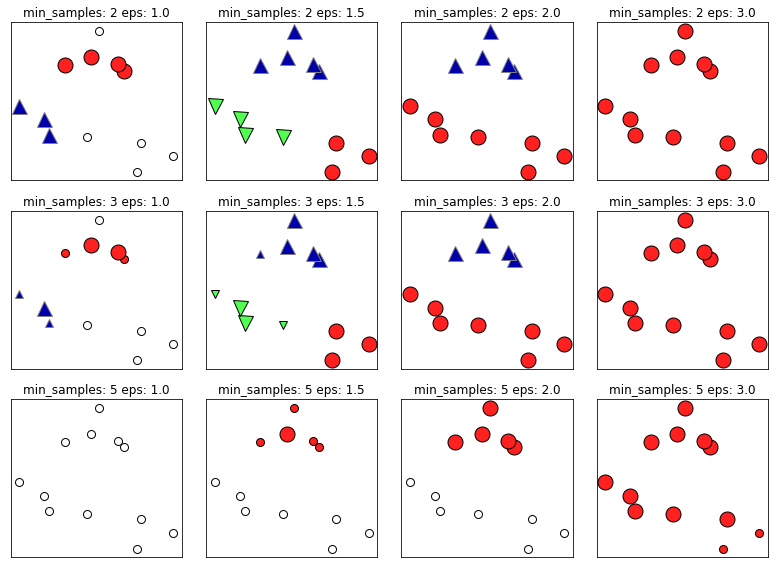

In [5]:
mglearn.plots.plot_dbscan()